In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sn

In [5]:
import os

print(os.listdir("../Anomaly Detection/Data"))

['purchase_credit_card.zip', 'res_purchase_card.zip', 'S&P Benchmark.zip', 'Twillio_data.zip', 'Variables_Dictionary_2019.zip', 'XYZloan_default_adj.zip', 'XYZloan_default_selected_vars.zip']


In [8]:
file = '../Anomaly Detection/Data/purchase_credit_card.zip'
dat = pd.read_csv(file)
dat.head() # year-mon, transaction and posted date needed to be fixed

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [16]:
dat.describe()#Year-Month is int and the other two is string

,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


In [102]:
# dat['temp'] = pd.to_datetime(dat['Year-Month'],errors='coerce')
# dat.temp.head()
# del dat['temp'] This aint work b

a=dat['Year-Month'][0].astype('str')
print(a[0:4])
print(a[4:])
del a

2013
07


In [81]:
dat['temp'] = dat['Year-Month'].astype('str')
dat['year'] = dat['temp'].apply(lambda x:x[0:4]).astype('int')
dat['month'] = dat['temp'].apply(lambda x:x[4:6]).astype('int')
# dat.drop(["temp"],axis=1)
del dat['temp']

In [83]:
dat.year.value_counts()

2014    225237
2013    217221
Name: year, dtype: int64

In [82]:
dat.month.value_counts().sort_values(ascending = False) 

10    40266
8     39314
4     39249
9     38762
3     38188
6     37955
7     37635
1     37230
5     36784
2     35831
11    34275
12    26969
Name: month, dtype: int64

In [95]:
pd.pivot_table(data=dat, values=['Amount'], index= ['year', 'month'], aggfunc= np.mean)

Amount
year month            
2013 7      419.180430
     8      455.041425
     9      451.768880
     10     435.781619
     11     380.471545
     12     435.988757
2014 1      397.368361
     2      389.060863
     3      460.854807
     4      425.228130
     5      405.716869
     6      436.586554

In [108]:
dat['Transaction Date'][0]

'07/30/2013 12:00:00 AM'

In [250]:
dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,2013-07-30,2013,7,30,Tuesday,2013-07-31,2013,7,31,Wednesday


In [111]:
dat['trans_date'] = pd.to_datetime(dat['Transaction Date'],errors='coerce')
dat['trans_yr'] = dat['trans_date'].apply(lambda x:x.year)
dat['trans_month'] = dat['trans_date'].apply(lambda x:x.month)
dat['trans_day'] = dat['trans_date'].apply(lambda x:x.day)
dat['trans_wkday'] = dat['trans_date'].apply(lambda x:x.weekday())
#dat['trans_hr'] = dat['trans_date'].apply(lambda x:x.hour).astype('int') hr is not correct
# in fact hr is all around Noon. So, let's not care for now
dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),year,month,trans_date,trans_yr,trans_month,trans_day,trans_wkday,trans_hr
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,2013-07-30,2013,7,30,1,0


In [112]:
del dat['trans_hr']

In [113]:
dat['post_date'] = pd.to_datetime(dat['Posted Date'],errors='coerce')
dat['post_yr'] = dat['post_date'].apply(lambda x:x.year)
dat['post_month'] = dat['post_date'].apply(lambda x:x.month)
dat['post_day'] = dat['post_date'].apply(lambda x:x.day)
dat['post_wkday'] = dat['post_date'].apply(lambda x:x.weekday())
#dat['post_hr'] = dat['post_date'].apply(lambda x:x.hour).astype('int')

dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,2013-07-30,2013,7,30,1,2013-07-31,2013,7,31,2


In [255]:
import calendar # now convert the weekday to string: {0: mon, 1:tues, ...}
#df['day_of_week'] = df['day_of_week'].apply(lambda x: calendar.day_name[x])
dat['trans_wkday'] = dat['trans_date'].astype('str').apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
dat['post_wkday'] = dat['post_date'].astype('str').apply(lambda x:calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

In [256]:
dat.groupby('trans_wkday')['Amount'].sum()

trans_wkday
Friday       37293469.56
Monday       25929153.78
Saturday      8653182.89
Sunday        2067077.44
Thursday     38082845.67
Tuesday      37771978.74
Wednesday    38243035.05
Name: Amount, dtype: float64

In [114]:
dat.shape

(442458, 23)

In [115]:
dat.isna().sum()
#dat.isnull().sum() no missing values!

Year-Month                      0
Agency Number                   0
Agency Name                     0
Cardholder Last Name            0
Cardholder First Initial        0
Description                     0
Amount                          0
Vendor                          0
Transaction Date                0
Posted Date                     0
Merchant Category Code (MCC)    0
year                            0
month                           0
trans_date                      0
trans_yr                        0
trans_month                     0
trans_day                       0
trans_wkday                     0
post_date                       0
post_yr                         0
post_month                      0
post_day                        0
post_wkday                      0
dtype: int64

### EDA

Agency and Vendor

In [11]:
dat['Agency Name'].value_counts()

OKLAHOMA STATE UNIVERSITY                   115995
UNIVERSITY OF OKLAHOMA                       76143
UNIV. OF OKLA. HEALTH SCIENCES CENTER        58247
DEPARTMENT OF CORRECTIONS                    22322
DEPARTMENT OF TOURISM AND RECREATION         17232
DEPARTMENT OF TRANSPORTATION                 15689
GRAND RIVER DAM AUTH.                        10427
DEPARTMENT OF REHABILITATION SERVICES         9162
DEPARTMENT OF VETERANS AFFAIRS                7708
S. W. OKLA. ST. UNIV.                         7488
OFFICE OF MANAGEMENT AND ENTERPRISE SERV      7066
MENTAL HEALTH AND SUBSTANCE ABUSE SERV.       6243
OKLAHOMA MILITARY DEPARTMENT                  5679
DEPARTMENT OF WILDLIFE CONSERVATION           5655
DEPARTMENT OF PUBLIC SAFETY                   5506
OKLA. PANHANDLE STATE UNIV.                   4252
TULSA COMMUNITY COLLEGE                       4093
OKLA. CAREER AND TECHNOLOGY EDUCATION         3867
DEPARTMENT OF AGRICULTURE                     3085
HISTORICAL SOCIETY             

In [156]:
print("There are %d number of Agency in the data" %(len(set(dat['Agency Name']))))

There are 124 number of Agency in the data


In [97]:
pd.pivot_table(data= dat, values= ['Amount'], index= ['Agency Name','year', 'month'], aggfunc= np.mean)

Amount
Agency Name                     year month            
ARDMORE HIGHER EDUCATION CENTER 2013 7      -69.221250
                                     8      232.635714
                                     9       62.644615
                                     10      96.643636
                                     11     216.634444
                                     12     131.925714
                                2014 1      132.262500
ATTORNEY GENERAL                2013 7      676.811594
                                     8      380.679194
                                     9      240.235258
                                     10     360.447239
                                     11     514.935260
                                     12     461.635210
                                2014 1      400.661429
                                     2      626.129490
                                     3      431.055546
                                     4      324.239568
                                     5      340.754148
                                     6      607.453759
BD. OF CHEM. TEST ALCOHOL/DRUG  2013 7      664.183333
                                     8      598.690000
                                     9       86.400000
                                     10     514.510000
                                     11     385.388571
                                     12     599.630000
                                2014 1      550.997500
                                     2      319.596000
                                     3      163.653333
                                     4      319.403846
                                     5      592.648889
...                                                ...
WATER RESOURCES BOARD           2014 1      146.369500
                                     2      152.132143
                                     3      264.441531
                                     4      371.695877
                                     5      271.780438
                                     6      185.602901
WILL ROGERS MEMORIAL COMMISSION 2013 7        0.000000
                                     8       72.080000
                                     9       56.440000
                                     11     113.475000
                                     12     142.953333
                                2014 1      108.153333
                                     2      100.445000
                                     3      228.631250
                                     4      163.058000
                                     5      240.364000
                                     6      233.666667
WORKER'S COMP. COMMISSION       2014 3       60.000000
WORKERS COMPENSATION COURT      2013 7       86.290000
                                     8      123.867500
                                     9       31.000000
                                     10     195.000000
                                2014 1      197.236667
`DEPARTMENT OF EDUCATION        2013 7      311.675243
                                     8      316.361359
                                     9      299.534571
                                     10     299.751173
                                     11     215.036933
                                     12     267.355672
                                2014 1      273.598395

[1287 rows x 1 columns]

In [163]:
dat.groupby('Agency Name')['Amount'].mean().reset_index()

,Agency Name,Amount
0,ARDMORE HIGHER EDUCATION CENTER,107.701356
1,ATTORNEY GENERAL,435.798823
2,BD. OF CHEM. TEST ALCOHOL/DRUG,384.162561
3,BD. OF EXAM. FOR LT CARE ADMIN,139.612353
4,BD. OF EXAM. FOR LT CARE ADMIN.,79.341333
5,BD. OF MED. LICENSURE & SUPV.,140.673614
6,BD. OF MEDICOLEGAL INVESTIGATIONS,351.344812
7,BD. OF PRIV. VOCATIONAL SCHOOLS,437.220000
8,BD. OF VETERINARY MED. EXAM.,217.798000
9,BOARD OF DENTISTRY,209.758971


In [174]:
#Top 10 agent has the highest? 

dat.groupby('Agency Name')['Amount'].mean().reset_index().sort_values(by = 'Amount', ascending = False)[1:10]

,Agency Name,Amount
45,GRAND RIVER DAM AUTH.,2130.414238
46,HEALTH CARE AUTHORITY,1508.664924
34,DEPARTMENT OF TRANSPORTATION,917.793488
71,OKLA. CITY COMMUNITY COLLEGE,853.910599
106,STATE DEPARTMENT OF HEALTH,830.819596
107,STATE ELECTION BOARD,739.631542
111,SUPREME COURT,682.335540
82,OKLAHOMA MILITARY DEPARTMENT,651.044765
66,OK. SCHOOL OF SCIENCE & MATH.,633.428619


In [165]:
print("There are %d number of Agency in the data" %(len(set(dat['Vendor']))))

There are 86729 number of Agency in the data


In [166]:
dat.groupby('Vendor')['Amount'].mean().reset_index()

,Vendor,Amount
0,#1 PARTY SUPPLIES,347.060000
1,#101 BLUE CORN,379.210000
2,#15 VS,58.435000
3,#17 VS,128.900000
4,#18 VS,137.872000
5,#22 PREFERRED PUMP & EQUI,562.076667
6,#41 BRIO COUNTRY CLUB,919.750000
7,#44 BRAVO| MEMORIAL SQUA,32.485714
8,0000000000000000000000000,55.160000
9,003 CENTURYLINK MY ACCOUN,69.157917


In [167]:
dat.groupby("Vendor")['Amount'].agg(['mean','max','min', 'median'])

,mean,max,min,median
Vendor,,,,
#1 PARTY SUPPLIES,347.060000,347.06,347.06,347.060
#101 BLUE CORN,379.210000,379.21,379.21,379.210
#15 VS,58.435000,64.95,51.92,58.435
#17 VS,128.900000,128.90,128.90,128.900
#18 VS,137.872000,227.79,26.97,191.840
#22 PREFERRED PUMP & EQUI,562.076667,1259.58,168.63,258.020
#41 BRIO COUNTRY CLUB,919.750000,919.75,919.75,919.750
#44 BRAVO| MEMORIAL SQUA,32.485714,38.98,13.00,34.570
0000000000000000000000000,55.160000,55.16,55.16,55.160


In [175]:
# top 10 vendors
dat.groupby('Vendor')['Amount'].mean().reset_index().sort_values(by = 'Amount', ascending = False)[1:10]

,Vendor,Amount
62611,PAYMENT ADJUSTMENT,676960.088333
78687,TK CONSTRUCTIO US LLC,270669.241429
31294,EMC CORPORATION,269333.120000
66965,ROHN PRODUCTS LLC,149500.000000
46454,JD C&F CO DIRECT SALES,75393.940000
45592,INVITROGEN 23538472,65882.750000
22219,BK MEDICAL SYSTEMS INC.,63959.000000
40715,FISHNET SECURITY,62330.138333
55026,MECO INC,57835.050000


In [183]:
# pd.crosstab(dat['Vendor'], dat['Amount'], normalize='columns') too big to make the crosstab
# Where ppl use the cc the most? 
dat['Vendor'].value_counts().sort_values(ascending = False)

STAPLES                      14842
AMAZON MKTPLACE PMTS         12197
WW GRAINGER                  12076
Amazon.com                   10766
BILL WARREN OFFICE PRODUC     4479
LOWES #00241                  4231
VWR INTERNATIONAL INC         3912
AT&T BILL PAYMENT             3064
AIRGAS CENTRAL                2682
AT&T DATA                     2622
WAL-MART #0137                2548
FASTENAL COMPANY01            2543
MCKESSON MEDICAL SUPPLY       2491
STAPLES       00105288        2137
WAL-MART #4241                2080
DMI  DELL HIGHER EDUC         2029
OKLA RESORTS PARKS & GOLF     2012
SIGMA ALDRICH US              1664
STAPLES DIRECT                1450
EUREKA WATER COMPANY          1353
SOUTH CENTRAL INDUSTRIES      1338
MSC                           1327
LOWES #01165                  1293
TFS FISHERSCI ECOM HUS        1287
DMI  DELL K-12/GOVT           1266
THE HOME DEPOT 3906           1264
ATT BUS PHONE PMT             1256
WWW.NEWEGG.COM                1221
NAPA AUTO PARTS     

Transaction Amount and post amount

In [118]:
print(pd.pivot_table(dat, values= ['Amount'], index = ['trans_month'], aggfunc=np.mean))
print(pd.pivot_table(dat, values= ['Amount'], index = ['post_month'], aggfunc=np.mean))

                 Amount
trans_month            
1            396.388895
2            409.196809
3            447.231686
4            420.215475
5            401.568246
6            453.082313
7            452.413145
8            459.781739
9            399.631501
10           435.166370
11           381.323614
12           439.542457
                Amount
post_month            
1           397.368361
2           389.060863
3           460.854807
4           425.228130
5           405.716869
6           436.586554
7           419.180430
8           455.041425
9           451.768880
10          435.781619
11          380.471545
12          435.988757


In [129]:
print("Transaction date and posted date are equal", round(len(dat[dat['trans_date'] == dat['post_date']]) / len(dat) * 100, 2), "% of the time")

Transaction date and posted date are equal 4.21 % of the time


In [134]:
(dat['post_date'] - dat['trans_date']).agg(['mean','max','min'])

mean   1 days 21:02:29.823034
max         183 days 00:00:00
min           0 days 00:00:00
dtype: timedelta64[ns]

As one can see, normally the mean days of diff btw the post and transaction date is about 1 day and 21 hours. 

First, let's take a look at the 183 days one that's very fishy

In [136]:
dat[dat['post_date'] - dat['trans_date'] == max(dat['post_date'] - dat['trans_date'])]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
31364,201310,1000,OKLAHOMA STATE UNIVERSITY,Tucker,E,GENERAL PURCHASE,-34.82,UNIVERSITEIT GENT,04/17/2013 12:00:00 AM,10/17/2013 12:00:00 AM,...,2013-04-17,2013,4,17,2,2013-10-17,2013,10,17,3


count the days that takes more than the average. 

In [141]:
delayed_days= dat[dat['post_date'] - dat['trans_date'] > (dat['post_date'] - dat['trans_date']).mean()]

print("the delayed days are ",round(len(delayed_days)/ len(dat)*100,2),'% of days')

the delayed days are  50.16 % of days


In [253]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

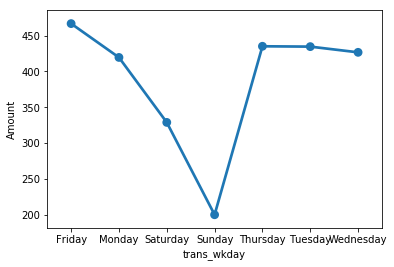

In [249]:
# plotting the mean trans amount by wkday
pp = sn.pointplot(x='trans_wkday',y='Amount',data=dat.groupby(['trans_wkday'])['Amount'].mean().reset_index())
plt.show()

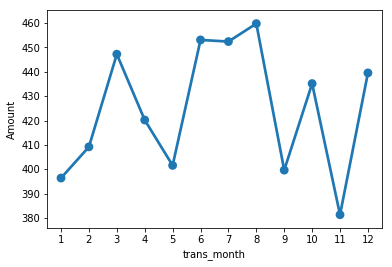

In [146]:
# plotting the mean trans amount by month
pp = sn.pointplot(x='trans_month',y='Amount',data=dat.groupby(['trans_month'])['Amount'].mean().reset_index())
plt.show()

In [149]:
dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,2013-07-30,2013,7,30,1,2013-07-31,2013,7,31,2


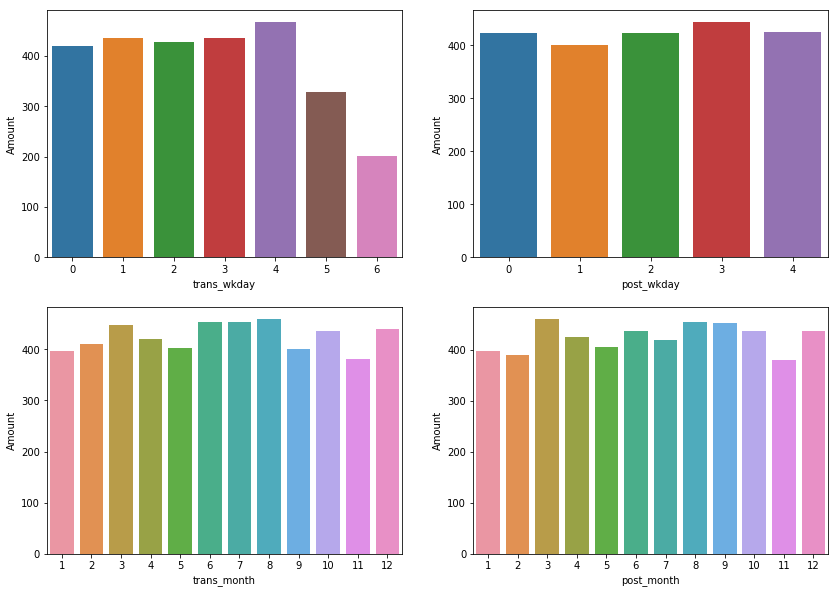

In [150]:
# comparing the trans amount with post amount! 

x = ['trans_wkday', 'post_wkday', 'trans_month', 'post_month']

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(14, 10)

p1 = sn.barplot(x = x[0], y = 'Amount', data = dat.groupby(x[0])['Amount'].mean().reset_index(), orient = 'v', ax= axes[0][0])
p2 = sn.barplot(x = x[1], y = 'Amount', data = dat.groupby(x[1])['Amount'].mean().reset_index(), orient = 'v', ax= axes[0][1])
p3 = sn.barplot(x = x[2], y = 'Amount', data = dat.groupby(x[2])['Amount'].mean().reset_index(), orient = 'v', ax= axes[1][0])
p4 = sn.barplot(x = x[3], y = 'Amount', data = dat.groupby(x[3])['Amount'].mean().reset_index(), orient = 'v', ax= axes[1][1])

plt.show()

In [164]:
dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,2013-07-30,2013,7,30,1,2013-07-31,2013,7,31,2


Cardholders

In [184]:
print("There are %d of the unique credit card holders" %(len(set(dat['Cardholder Last Name']))))

There are 3911 of the unique credit card holders


In [185]:
dat.groupby('Cardholder Last Name')['Amount'].mean().reset_index().sort_values(by = 'Amount', ascending = False)

,Cardholder Last Name,Amount
9,77000,609039.725000
10,81500,171619.610000
8,75000,29873.610000
3186,STIERWALT,21230.366000
3418,Stinson,12363.795000
2940,ROYAL,11147.308193
2279,MECHAM,10984.780357
665,Cardholder,10961.525862
1769,Hunter,8984.752442
1558,HUENERGARDT,8462.211143


Looks like there are some problmen with the cardholders last name: names are number and there are some - amounts users

First, let's look at the ppl with negative amounts

In [199]:
a = dat.groupby('Cardholder Last Name')['Amount'].mean().reset_index(name = 'negative')

a[a['negative'] < 0]

,Cardholder Last Name,negative
619,COTTS,-85.840400
1252,GENTRY,-112.015000
1531,HODGSON,-87.990000
2123,Leas,-37.890000
2134,Lemke,-12.805000
2213,MACKIE,-61.103750
3139,SHOCKLEY,-30.990000
3158,SMALLING,-39.666667
3376,Speight,-38.900000


In [204]:
names = []
for i in dat['Cardholder Last Name']:
    if(i.isnumeric() == True):
        names.append(i)

In [211]:
# parse the last names are numeric only!
dat[dat['Cardholder Last Name'].isin(names) == True]

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
95546,201307,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,07/15/2013 12:00:00 AM,07/15/2013 12:00:00 AM,...,2013-07-15,2013,7,15,0,2013-07-15,2013,7,15,0
95555,201307,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,07/25/2013 12:00:00 AM,07/25/2013 12:00:00 AM,...,2013-07-25,2013,7,25,3,2013-07-25,2013,7,25,3
95614,201308,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,08/15/2013 12:00:00 AM,08/15/2013 12:00:00 AM,...,2013-08-15,2013,8,15,3,2013-08-15,2013,8,15,3
95635,201308,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,08/26/2013 12:00:00 AM,08/26/2013 12:00:00 AM,...,2013-08-26,2013,8,26,0,2013-08-26,2013,8,26,0
95715,201309,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,6.54,PURCHASE FINANCE CHARGE,09/13/2013 12:00:00 AM,09/13/2013 12:00:00 AM,...,2013-09-13,2013,9,13,4,2013-09-13,2013,9,13,4
95841,201312,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.04,PURCHASE FINANCE CHARGE,12/13/2013 12:00:00 AM,12/13/2013 12:00:00 AM,...,2013-12-13,2013,12,13,4,2013-12-13,2013,12,13,4
95855,201312,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,12/26/2013 12:00:00 AM,12/26/2013 12:00:00 AM,...,2013-12-26,2013,12,26,3,2013-12-26,2013,12,26,3
95884,201401,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,0.77,PURCHASE FINANCE CHARGE,01/15/2014 12:00:00 AM,01/15/2014 12:00:00 AM,...,2014-01-15,2014,1,15,2,2014-01-15,2014,1,15,2
121795,201307,42000,LANGSTON UNIVERSITY,42000,4,GENERAL PURCHASE,1.17,PURCHASE FINANCE CHARGE,07/04/2013 12:00:00 AM,07/04/2013 12:00:00 AM,...,2013-07-04,2013,7,4,3,2013-07-04,2013,7,4,3
121850,201308,42000,LANGSTON UNIVERSITY,42000,4,GENERAL PURCHASE,350.21,LATE PAYMENT FEE,08/14/2013 12:00:00 AM,08/14/2013 12:00:00 AM,...,2013-08-14,2013,8,14,2,2013-08-14,2013,8,14,2


In [212]:
len(dat[dat['Cardholder Last Name'].isin(names) == True])

66

In [239]:
a = dat[dat['Cardholder Last Name'].isin(names) == True]

len(a[a['Cardholder Last Name'].astype('int') == a['Agency Number']])

66

it seems that the Cardholder Last Name is same as that of Agency Number. So, i presume that the name is fine. 

In [240]:
dat.head(1)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,trans_date,trans_yr,trans_month,trans_day,trans_wkday,post_date,post_yr,post_month,post_day,post_wkday
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,2013-07-30,2013,7,30,1,2013-07-31,2013,7,31,2
